In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl # plotting data
import matplotlib.pyplot as plt # plotting data
import seaborn as sns # plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Would these people have survived the Titanic?

This notebook serves as the predominate repository for my work on the Kaggle comeptition about the Titanic. It will contain all of my code and analysis for that purpose. Let's hope it doesn't share the same fate of the ship did!

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## The Data

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Let's start by looking at the data in the training set, ```train.csv```. My preferred format is a *pandas* dataframe, so let's use that.

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can see that there are some interesting data points here. We can see the surival of passengers, passenger class, name, sex, age, siblings/spouses, parents/children, ticket number, fare paid, cabin number, and embarkcation point. I think we may need a structure to help us remember what all of these variables mean, so let's make sure we have that.

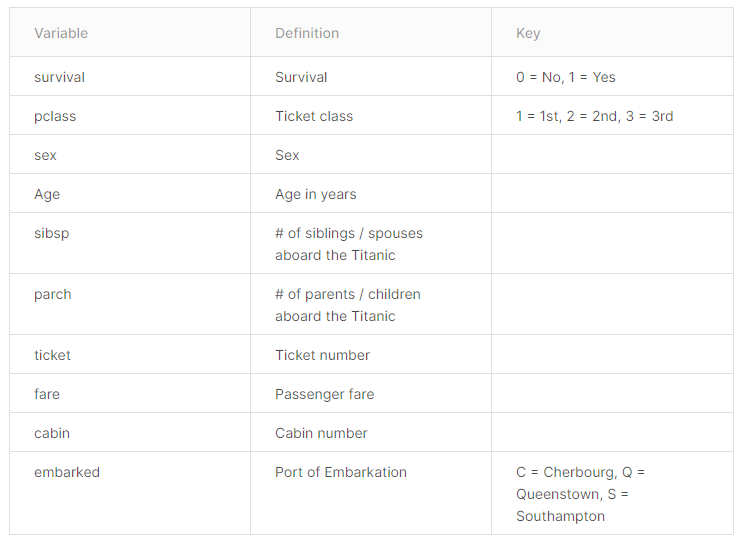

Okay, so now we know what we are looking at. Before we can build a model to predict the surivival chance of individuals, we have to better understand this data set. We'll start by looking at some basic information.

In [3]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

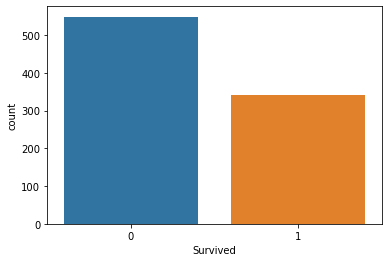

In [4]:
#Visualize the survival counts
sns.countplot(df_train['Survived'],label='Count')

So this tells use what the distribution of **survivors** looks like the in the ```train.csv``` data. We need to know more about the individuals. Let's start by looking at sex.

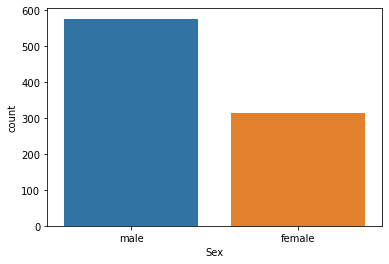

In [5]:
sns.countplot(df_train['Sex'],label='Count')

So that's the whole distribution, or everyone in the data set, but what about just the survivors?

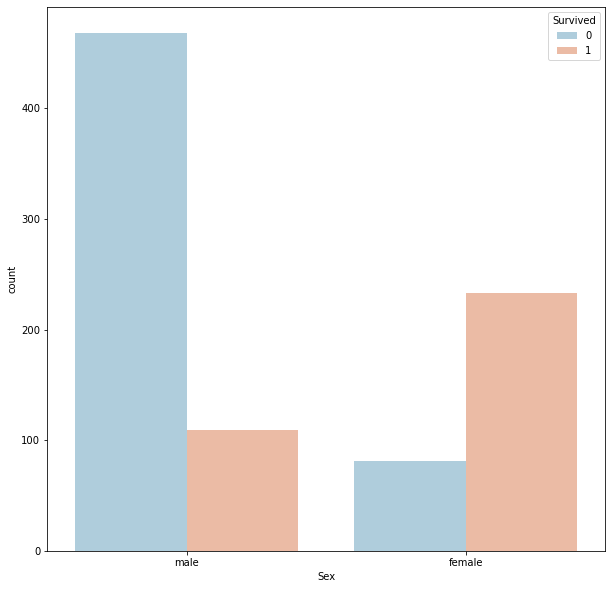

In [6]:
plt.subplots(figsize=(10,10))
sns.countplot('Sex',hue='Survived',data=df_train,palette='RdBu_r')
plt.show()

So it looks like you were more likely to survive the disaster as a female. Interesting. 

Let's look at the breakdown for Pclass, or the class of cabin the individual was in on board. This is basically socioeconmic status for the passengers.

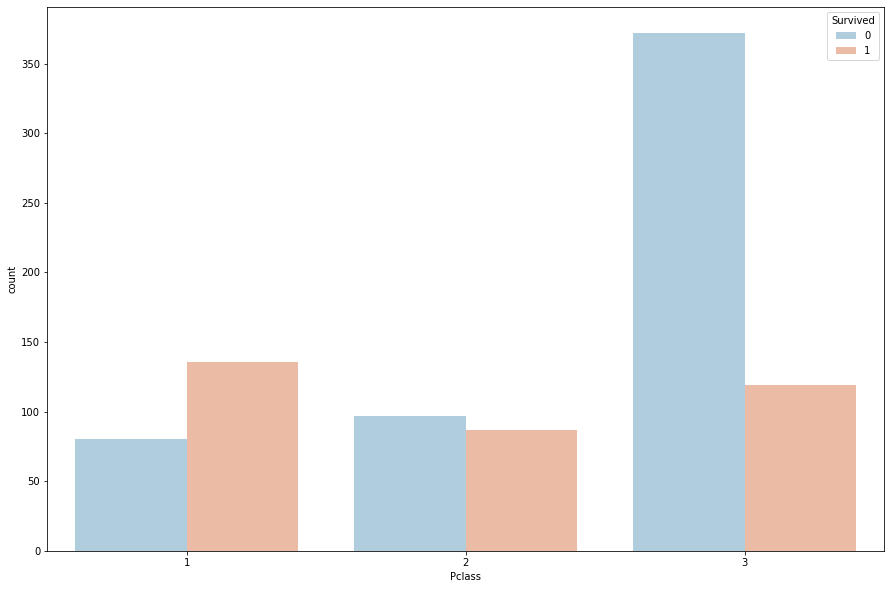

In [7]:
plt.subplots(figsize=(15,10))
sns.countplot('Pclass',hue='Survived',data=df_train,palette='RdBu_r')
plt.show()

Unsurprisingly, you were more likely to survive the disaster if you were a higher class passenger. Let's see what this first two factors (Pclass and Sex) look like charted together.

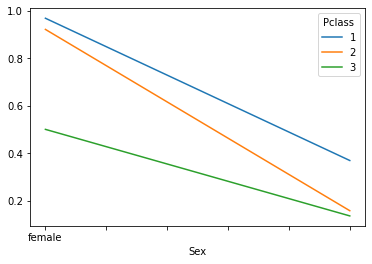

In [8]:
df_train.pivot_table('Survived', index='Sex', columns='Pclass').plot()

This chart really shows the disparity in survival rates between male and female passengers across all classes, but also the large gap in survival rates beteween classes for female passengers. Note that the survival rate is the y axis and the two ends fo the graph (left and right sides) represent female and male, respectively.

The next factor we are going to look at is passenger age.

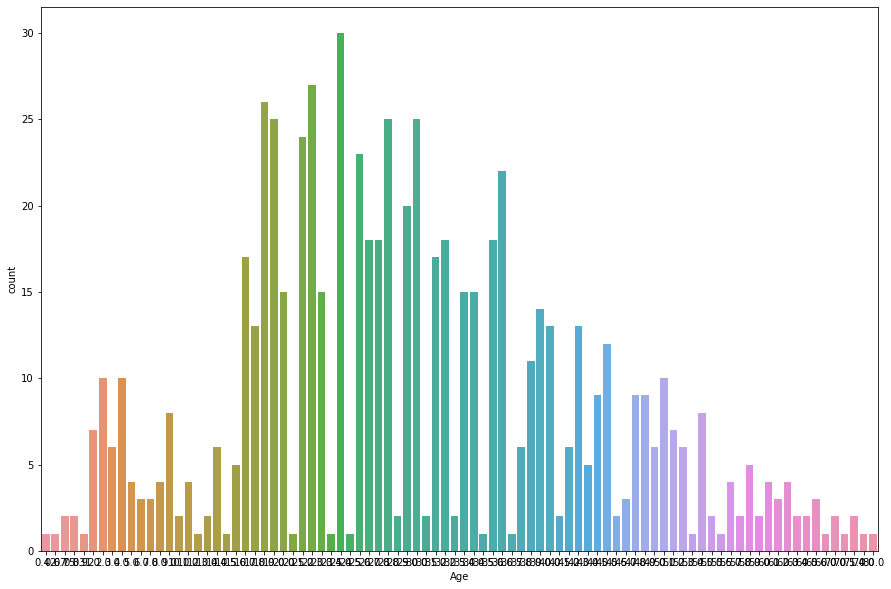

In [9]:
plt.subplots(figsize=(15,10))
sns.countplot(df_train['Age'],label='Age')
plt.show()

Not immediately all that helpful. Let's try breaking it into age groups.

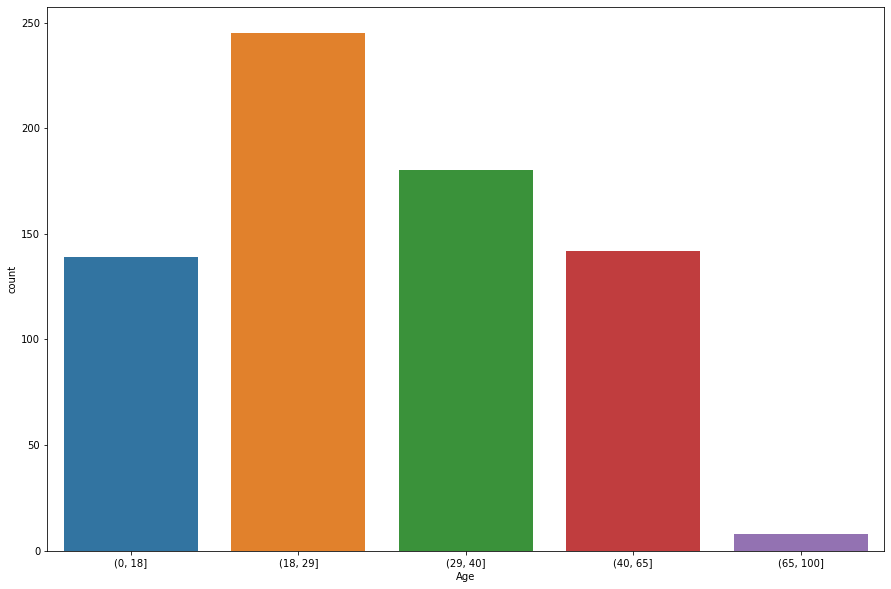

In [10]:
age = pd.cut(df_train['Age'], [0,18,29,40,65,100])
plt.subplots(figsize=(15,10))
sns.countplot(age,label='Age')
plt.show()

Interesting. We can see the general distribution of ages in our data set much easier in this grouping. Let's try looking at which age groups survived more often.

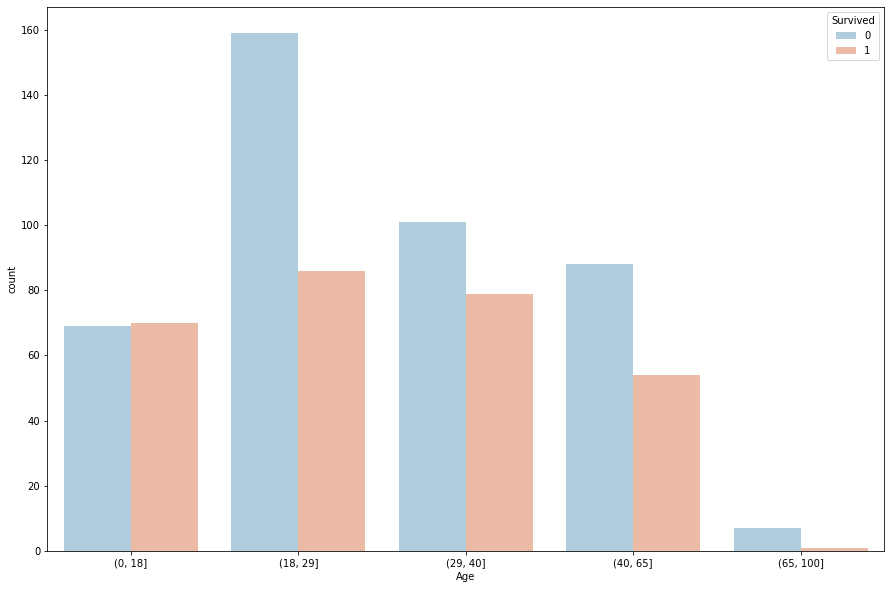

In [11]:
plt.subplots(figsize=(15,10))
sns.countplot(age,hue='Survived',data=df_train,palette='RdBu_r')
plt.show()

We can see that generally, children were more likely to survive, but we also know that females survived at a much higher rate. Let's look at gender and age together.

In [12]:
df_train['Range'] = age

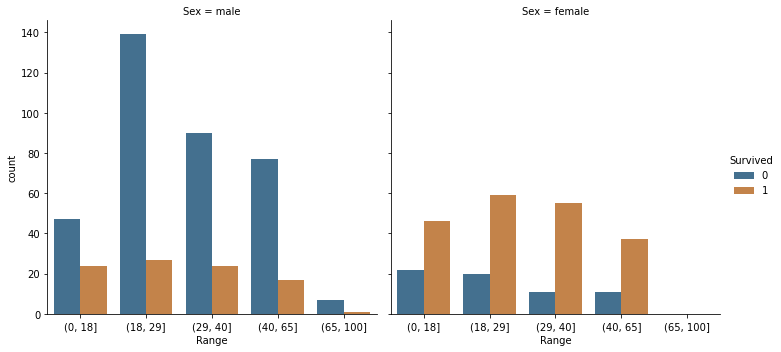

In [13]:
sns.catplot(x='Range', hue='Survived', col='Sex',
                data=df_train, kind='count',saturation=.5);

Now we can really see the disparity in the survival rates. Let's try combining this with passenger class and see what we can get out.

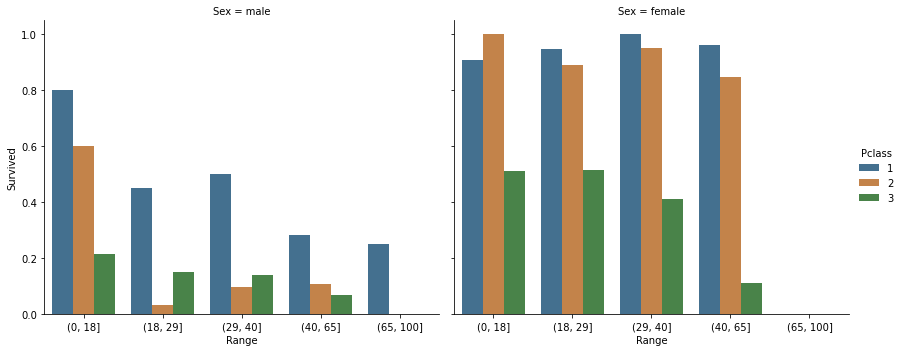

In [14]:
sns.catplot(x='Range',y='Survived', hue='Pclass', col='Sex',
                data=df_train, kind='bar', ci=None, saturation=.5, aspect=1.2);

This graph shows the rate of sruvivale, from 0 to 1 (0% to 100%) for each class of passenger by age group. We can clearly see the disparity between sex and passenger class here. Females are much more likely to survive than males in every age group, but also across passenger classes. In fact, 3rd class females are generally more likely to survive than first or second class males of the same age group. 

Maybe Jack never stood a chance, door or no door.

We also have data about people traveling alone or with someone. Let's take a look at that next.

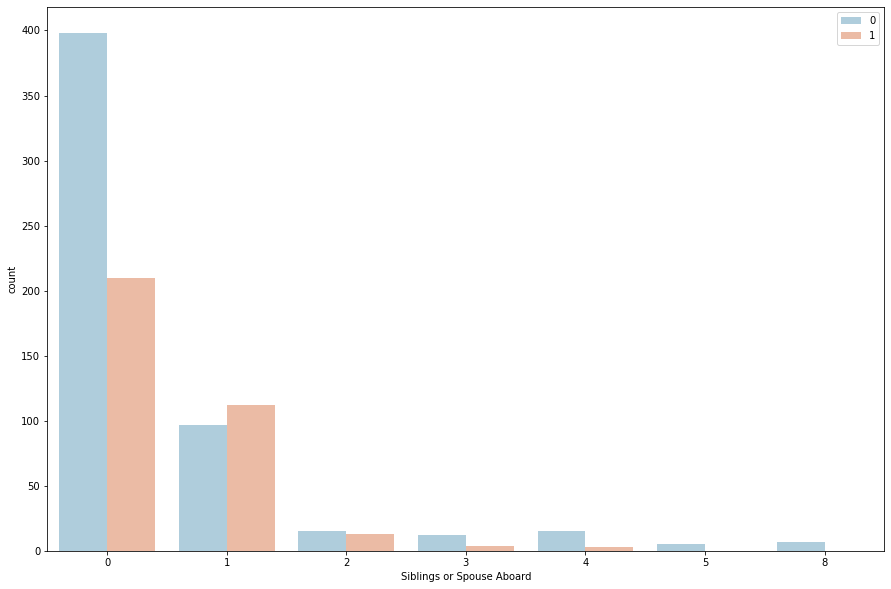

In [15]:
plt.subplots(figsize=(15,10))
sns.countplot('SibSp',hue='Survived',data=df_train,palette='RdBu_r')
plt.xlabel('Siblings or Spouse Aboard')
plt.legend(loc = 'upper right')
plt.show()

This chart shows us the number of indidivudals who survived based on the number of Children or Spouses they were traveling with. The data combines those values, and seperating them would require assuming the number of children, so we are going to leave it be.

We should probably break this down by Sex and Passenger Class, so we will do that next.

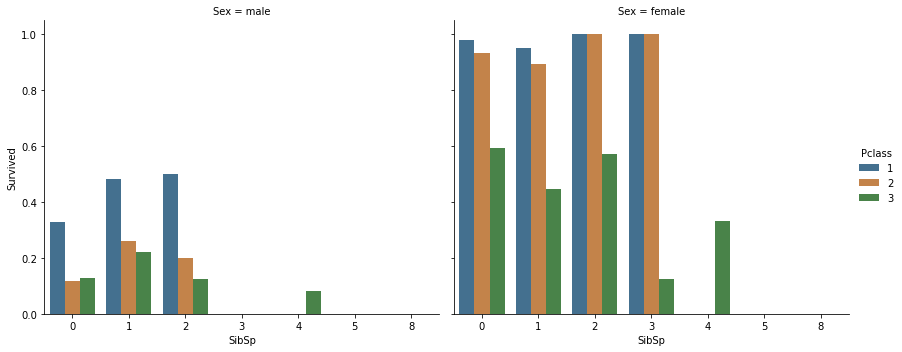

In [16]:
sns.catplot(x='SibSp',y='Survived', hue='Pclass', col='Sex',
                data=df_train, kind='bar', ci=None, saturation=.5, aspect=1.2);

Again, this is a chart that doesn't show count, but the chances of survival. It looks like females again out survived males accross the board. We can see that females in first and second class traveling with siblings (2 or 3, so we will assume they aren't spouses) universally survived. We will guess those are children for now, as it is really just a matter of curiosity and won't effect our approach to the overall problem.

Let's look next at those individuals traveling with Parents or Children.

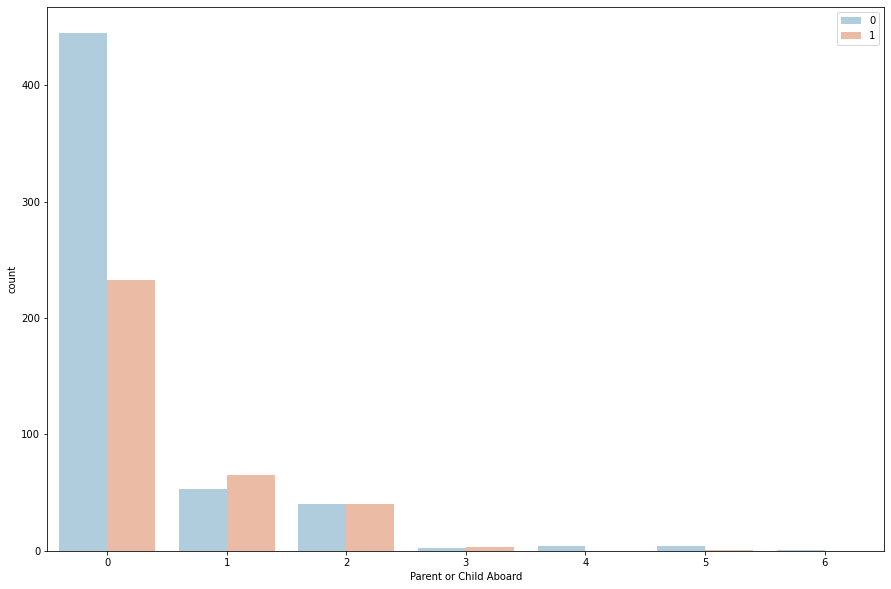

In [17]:
plt.subplots(figsize=(15,10))
sns.countplot('Parch',hue='Survived',data=df_train,palette='RdBu_r')
plt.xlabel('Parent or Child Aboard')
plt.legend(loc = 'upper right')
plt.show()

We can see that those traveling with a parent or child aboard had varying success. We should break this data down as well and see what we can derive from it.

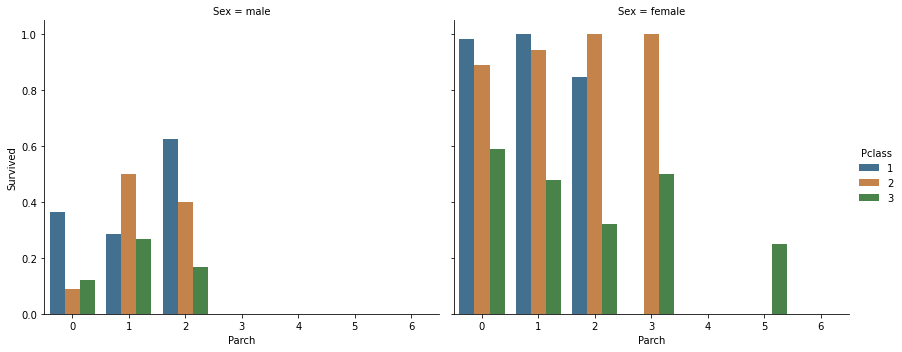

In [18]:
sns.catplot(x='Parch',y='Survived', hue='Pclass', col='Sex',
                data=df_train, kind='bar', ci=None, saturation=.5, aspect=1.2);

Again, this is a chart that doesn't show count, but the chances of survival. It looks like females again out survived males accross the board. We can see that females in second class traveling with children (3, so we will assume they aren't parents) universally survived. We can also see that females in second class traveling with either both parents or 2 Children (which would mean they were aboard without a Spouse, which would likely have been rare) also universally survived. Interesting.

We are getting close to the end of our exploration. Let's a look at fares next.

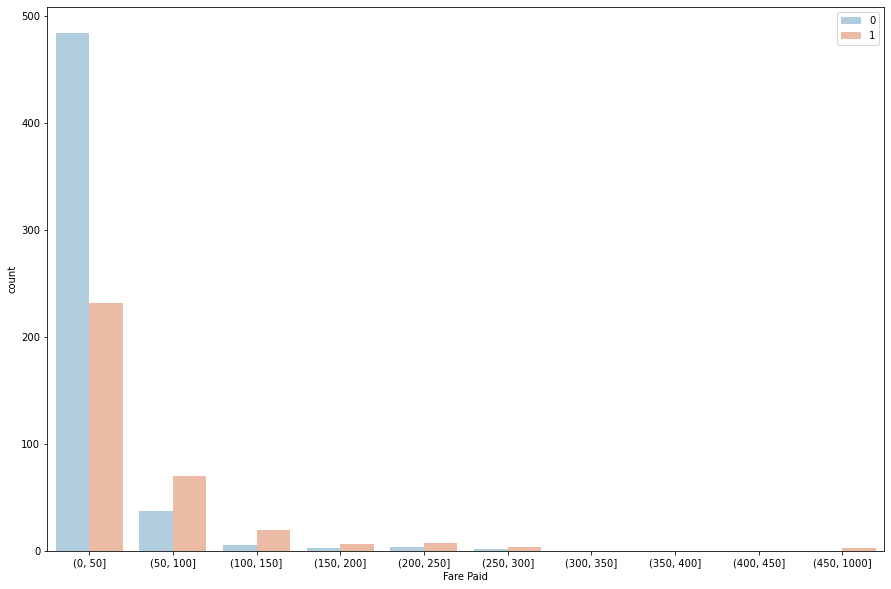

In [19]:
fares = pd.cut(df_train['Fare'], [0,50,100,150,200,250,300,350,400,450,1000])
df_train['F_Range'] = fares

plt.subplots(figsize=(15,10))
sns.countplot('F_Range',hue='Survived',data=df_train,palette='RdBu_r')
plt.xlabel('Fare Paid')
plt.legend(loc = 'upper right')
plt.show()

Well, that isn't very helpful. We can see that people who paid more survived at a highger rate, but we could have assumed that from the passenger class data. Let's break it down by that as well and see if that helps.

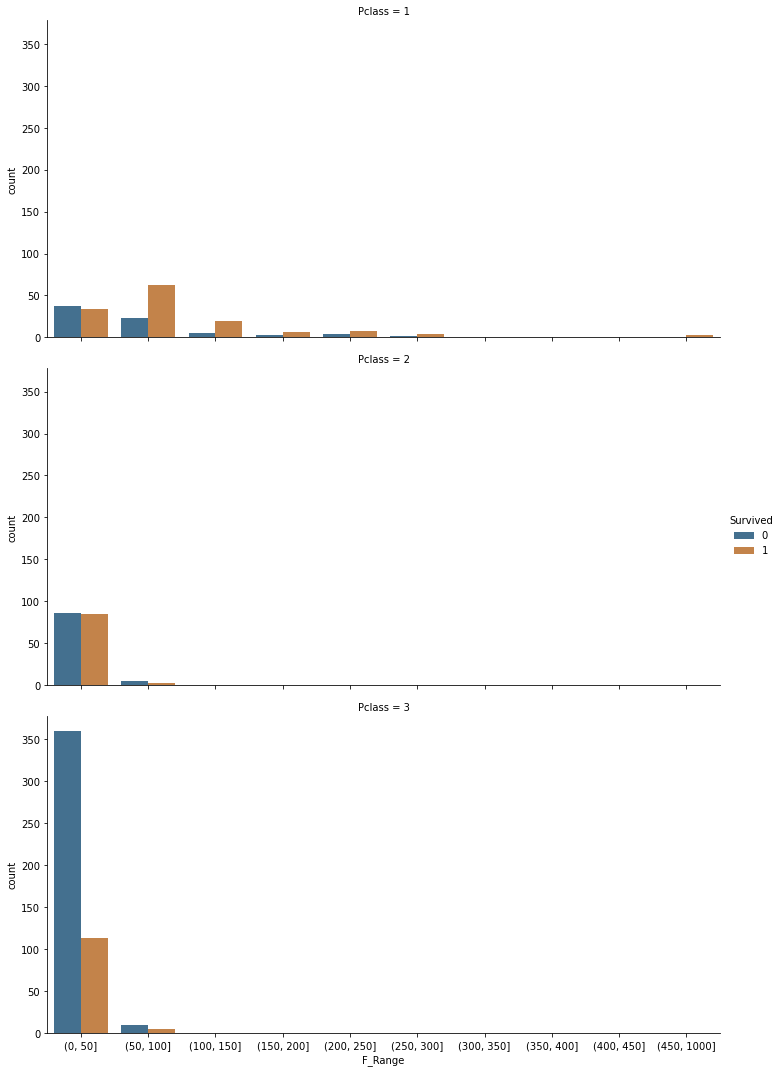

In [20]:
sns.catplot(x='F_Range', hue='Survived', col='Pclass',
                data=df_train, kind='count', saturation=.5, aspect=2, col_wrap=1);

Interesting. Paying more within First Class made you more likely to survive? I'm not sure that's completely causal, but the relationship is interesting. Let's add in the Sex data, since we know that there is always something to that.

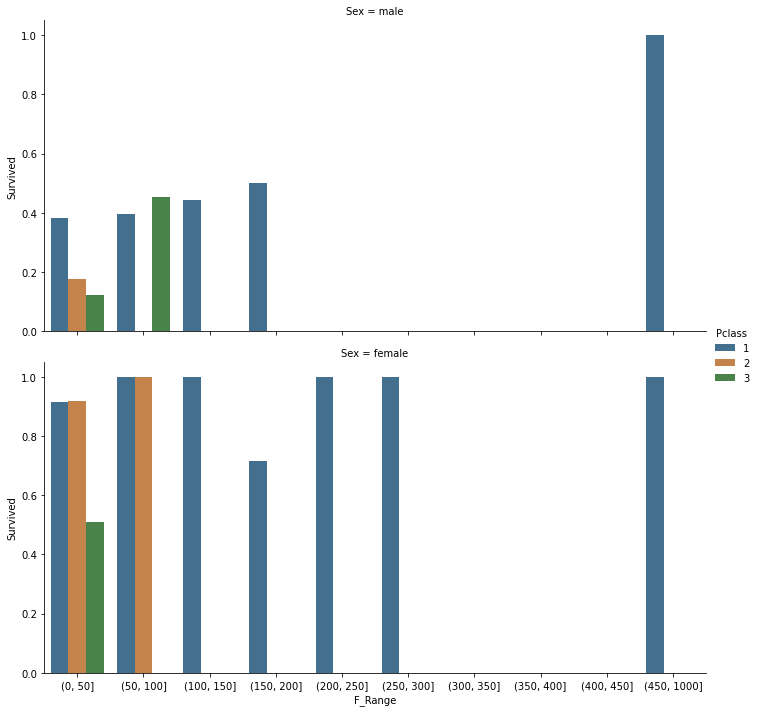

In [21]:
sns.catplot(x='F_Range',y='Survived', hue='Pclass', col='Sex',
                data=df_train, kind='bar', ci=None, saturation=.5, aspect=2, col_wrap=1);

Here is a very intriguing find. Males who paid more for third class tickets survived a little more than twice as often as males who paid less for third class tickets. I guess we will keep that in our model!

## Categories for Model Building

I think we have a good handle on what is in the data and what patterns we see. The remaining data points (Name, Cabin Number, Embarkation Point, and Ticket Number) don't seem like they would be helpful to our predictive model, and could lead to errors if included. To confirm this thinking, let's look at the correlations for each point with sruvival rate.

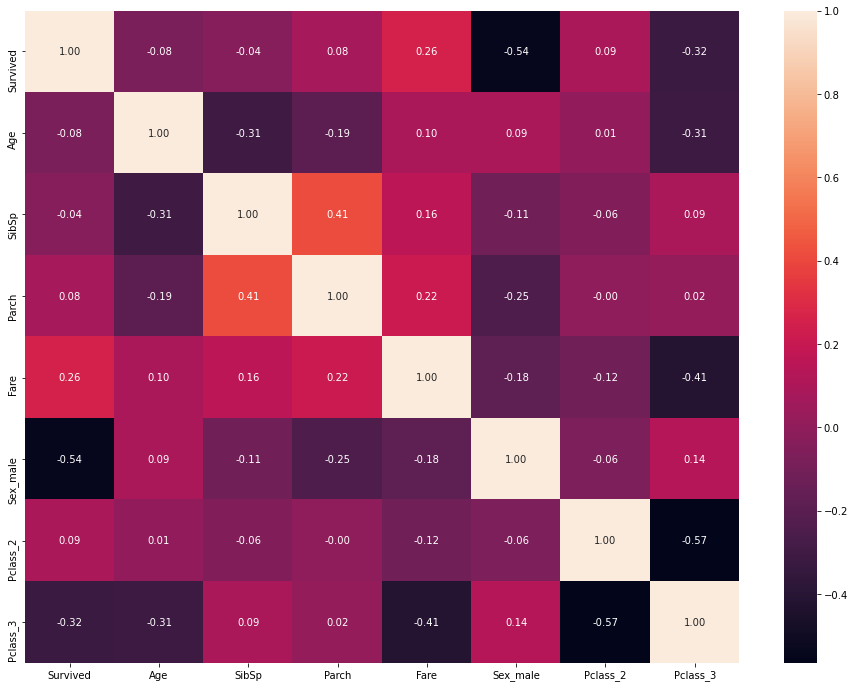

In [22]:
df_corr = pd.read_csv('/kaggle/input/titanic/train.csv') # pulling a clean copy without our added columns

df_corr = pd.get_dummies(df_corr, columns=['Sex','Pclass'],
                        drop_first=True)

# Let's drop some data from the frame that we know isn't helpful
df_corr.drop(['Name','Ticket','Cabin','Embarked','PassengerId'], axis=1, inplace=True)

corr=df_corr.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

We can see by looking at the top row that the strongest correlations exist between Sex, Passenger Class, and Fare Paid, with weaker correlations to Age and Traveling Companion numbers. We will still keep the weak correlations in the data set for our model, however.

### Deciding on a Model Type

So one approach to this problem would be to use a decision tree, because we have categories that we can look at as branch points. The issue is that a single tree for data with this many points would be massive and likely inaccurate. The solution? A forest.

There is a model known as a Random Forest that uses multiple (hundreds) of trees and assignes values based on which gets the most 'votes', or what the most common result is between all the trees. It works particularly well on values with ranges, like our data set. Let's plan on using that.

In [23]:
from sklearn.ensemble import RandomForestClassifier

## Gathering the Pieces

From some various modeling and testing, We found good values for the number of 'trees' to use, as well as how many 'branches' they should have. We will set those values to variables for use later.

In [24]:
trees = 106
branches = 5

We also have decided on our features, so let's set that up as well.

In [25]:
features = ['Pclass', 'Sex', 'Range', 'SibSp', 'Parch','F_Range']

Now, before we can make the model and run it, we need to prepare the data. We will use our modified train data set with the categories for age and fare, but we are going to need to do the same modifications to the testing set. Let's get everything ready to go.

In [26]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv") # import testing set

# add fare ranges
test_fares = pd.cut(df_test['Fare'], [0,50,100,150,200,250,300,350,400,450,1000])
df_test['F_Range'] = test_fares

# add age ranges
test_age = pd.cut(df_test['Age'], [0,18,29,40,65,100])
df_test['Range'] = test_age

In [27]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_Range,Range
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,"(0, 50]","(29, 40]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,"(0, 50]","(40, 65]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,"(0, 50]","(40, 65]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,"(0, 50]","(18, 29]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,"(0, 50]","(18, 29]"


Looks like that worked. We can see that there isn't any 'Survived' category in the testing set, but that's exactly what we are trying to predict, so that's expected. Otherwise, I think this is ready to build. 

One final thing, tho. We need to normalize and sanitize the data for the model, so we are going to do some one-hot encoding and pass it through an imputer before we build and run the model. Nothing out of the ordinary with that, but I wanted to point it out.

In [28]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()

Now that we have our imputer, we are ready to build our model and run it. Let's get to it!

In [29]:
y = df_train['Survived']

X = pd.get_dummies(df_train[features])
X_imp = my_imputer.fit_transform(X)
X_test = pd.get_dummies(df_test[features])
X_test_imp = my_imputer.fit_transform(X_test)
forest =  RandomForestClassifier(n_estimators=trees,
                                 max_depth=branches,
                                 random_state=1)
forest.fit(X_imp,y)
prediction = forest.predict(X_test_imp)

output = pd.DataFrame({'PassengerId': df_test.PassengerId,
                       'Survived': prediction})
output.to_csv('my_submission.csv', index=False)
print('Done.')

Done.


## Results

So we got the following data out of our Random Forst model.

In [30]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


This was good for 77.99% accurate on the Kaggle submissions board. Okay, but not great. I'm not sure we can tune this model for much better accuracy. Perhaps there is another approach, but I am ready to move on from the Titanic and take on another problem. See you next time!